In [14]:
from matplotlib.pylab import gca, figure, plot, subplot, title, xlabel, ylabel, xlim,show
from matplotlib.lines import Line2D
import src.segment as segment
import src.fit as fit
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Paramter

In [5]:
DATA_PATH = "data/SWaT/"

In [6]:
def draw_plot(data,plot_title):
    plot(range(len(data)),data,alpha=0.8,color='red')
    title(plot_title)
    xlabel("Samples")
    ylabel("Signal")
    xlim((0,len(data)-1))

def draw_segments(segments):
    ax = gca()
    for segment in segments:
        line = Line2D((segment[0],segment[2]),(segment[1],segment[3]))
        ax.add_line(line)

def draw_xvline(segments):
    for seg in segments:
        x0 = seg[0]
        plt.axvline(x=x0)

# Function description

# Segmentation 

## Data 2015

In [9]:
SWaT_2015_df = pd.read_pickle(DATA_PATH + "swat_2015_attack_df.pkl")

In [10]:
SWaT_2015_df

,MV304,LIT301,AIT504,LIT101,UV401,AIT502,P501,Label,Timestamp,label_MV304,label_LIT301,label_AIT504,label_LIT101,label_UV401,label_AIT502,label_P501
50401,1,817.8592,12.49680,814.2200,2,142.8608,2,Normal,2015-12-29 00:00:01,0,0,0,0,0,0,0
50402,1,816.8178,12.49680,814.4162,2,142.8608,2,Normal,2015-12-29 00:00:02,0,0,0,0,0,0,0
50403,1,816.2571,12.49680,814.0237,2,142.8608,2,Normal,2015-12-29 00:00:03,0,0,0,0,0,0,0
50404,1,815.9767,12.49680,814.1415,2,142.8608,2,Normal,2015-12-29 00:00:04,0,0,0,0,0,0,0
50405,1,815.2557,12.49680,814.2200,2,142.8608,2,Normal,2015-12-29 00:00:05,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136795,1,794.7882,13.95796,763.5839,2,144.6039,2,Normal,2015-12-29 23:59:55,0,0,0,0,0,0,0
136796,1,794.7482,13.95796,762.7596,2,144.6039,2,Normal,2015-12-29 23:59:56,0,0,0,0,0,0,0
136797,1,794.8683,13.95796,761.7783,2,144.6039,2,Normal,2015-12-29 23:59:57,0,0,0,0,0,0,0
136798,1,795.3489,13.95796,761.1895,2,144.6039,2,Normal,2015-12-29 23:59:58,0,0,0,0,0,0,0


In [11]:
SWaT_2015_df.shape

(86399, 16)

In [12]:
data = list(SWaT_2015_df.LIT301.values)

## Data 2019

In [17]:
SWaT_2019_df = pd.read_pickle(DATA_PATH + "swat_2019_attack_df.pkl")

In [18]:
SWaT_2019_df

,FIT 401,LIT 301,P601 Status,MV201,P101 Status,MV 501,P301 Status,Timestamps,label_FIT 401,label_LIT 301,label_P601 Status,label_MV201,label_P101 Status,label_MV 501,label_P301 Status
0,0.781740,730.702100,1,2,2,2,1,2019-07-20 04:30:00.000000000,0,0,0,0,0,0,0
1,0.782380,730.902344,1,2,2,2,1,2019-07-20 04:30:01.000000000,0,0,0,0,0,0,0
2,0.783021,732.344300,1,2,2,2,1,2019-07-20 04:30:02.004013000,0,0,0,0,0,0,0
3,0.783021,732.704800,1,2,2,2,1,2019-07-20 04:30:03.004013000,0,0,0,0,0,0,0
4,0.781228,732.744800,1,2,2,2,1,2019-07-20 04:30:04.000000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14991,0.809271,883.227051,1,2,2,2,2,2019-07-20 08:39:55.001007000,0,0,0,0,0,0,0
14992,0.809271,883.227051,1,2,2,2,2,2019-07-20 08:39:56.005004800,0,0,0,0,0,0,0
14993,0.809271,883.387268,1,2,2,2,2,2019-07-20 08:39:57.005004800,0,0,0,0,0,0,0
14994,0.808631,883.908000,1,2,2,2,2,2019-07-20 08:39:58.005004800,0,0,0,0,0,0,0


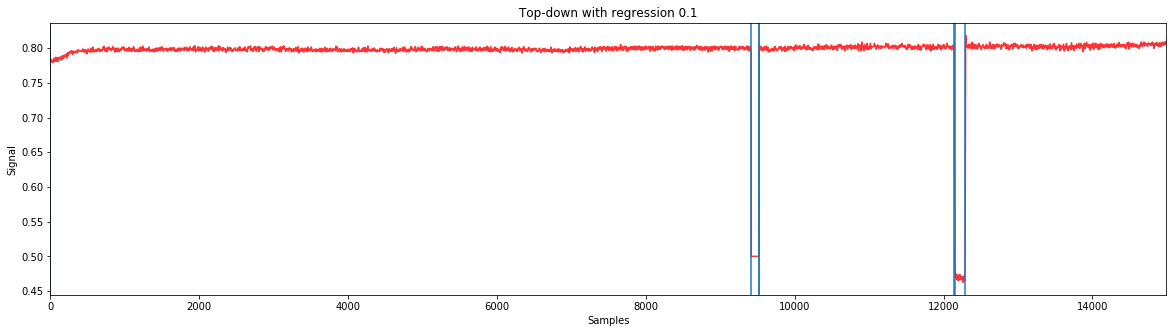

In [32]:
max_error = 0.1
data = list(SWaT_2019_df["FIT 401"].values)
ts_segments, line_segments = segment.get_ts_segments(segment.topdownsegment, data, fit.regression, fit.sumsquared_error, max_error)
figure(figsize=(20,5))
draw_plot(data,"Top-down with regression 0.1")
draw_xvline(line_segments)

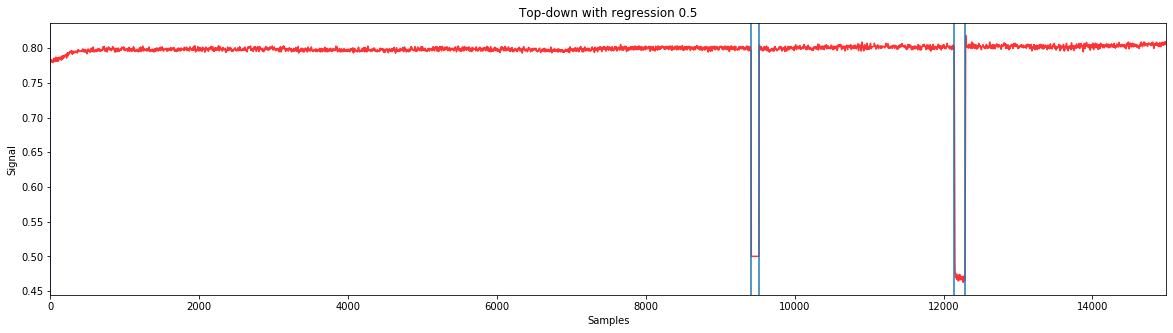

In [33]:
max_error = 0.5
data = list(SWaT_2019_df["FIT 401"].values)
ts_segments, line_segments = segment.get_ts_segments(segment.topdownsegment, data, fit.regression, fit.sumsquared_error, max_error)
figure(figsize=(20,5))
draw_plot(data,"Top-down with regression 0.5")
draw_xvline(line_segments)

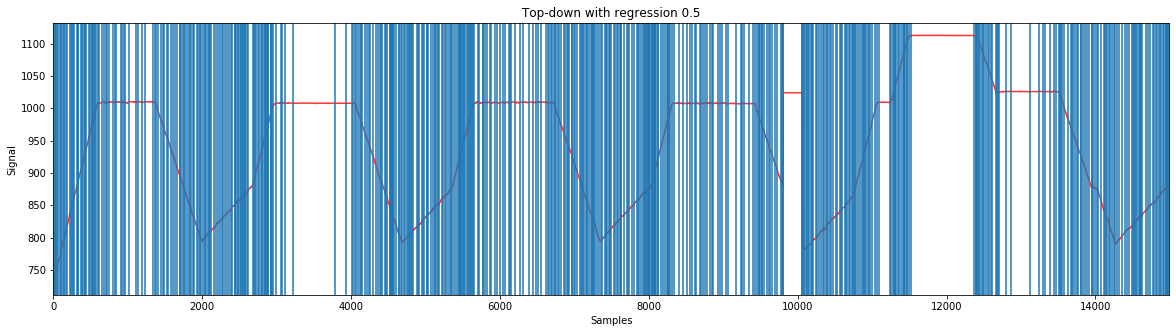

In [35]:
max_error = 0.5
data = list(SWaT_2019_df["LIT 301"].values)
ts_segments, line_segments = segment.get_ts_segments(segment.topdownsegment, data, fit.regression, fit.sumsquared_error, max_error)
figure(figsize=(20,5))
draw_plot(data,"Top-down with regression 0.5")
draw_xvline(line_segments)

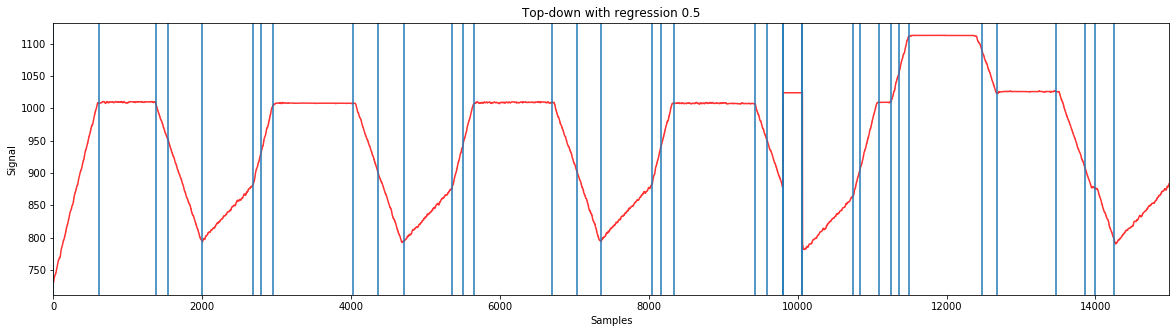

In [44]:
max_error = 10000
data = list(SWaT_2019_df["LIT 301"].values)
ts_segments, line_segments = segment.get_ts_segments(segment.topdownsegment, data, fit.regression, fit.sumsquared_error, max_error)
figure(figsize=(20,5))
draw_plot(data,"Top-down with regression 0.5")
draw_xvline(line_segments)